## Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

### Data fields
Here's a brief version of what you'll find in the data description file.


* SalePrice - the property's sale price in dollars. This is the target variable
 that you're trying to predict.

* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

## Importing Data and Libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import data

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/kaggleHouseTrain.csv')

test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/KaggleHouseTest.csv')


## EDA

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


Given there are already an excessive number of features for a model to use, we will drop any feature with more than 81 missing values. This way treatment of missing values by dropping rows or imputing won't affect a large percentage of our dataset.

We will create a function for this initial data cleaning so we can recreate it with our test data.

In [11]:
#a list of columns to drop
drop_columns = df.columns[df.isnull().sum() > 81].tolist()

In [12]:
#dropping the columns
df = df.drop(columns=drop_columns, errors='ignore')

In [16]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
GarageType,81
GarageYrBlt,81
GarageFinish,81


Going to look into those rows all missing 81 entries

In [17]:
missing_counts = df.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]
print(missing_cols.sort_values(ascending=False))

GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageType      81
GarageCond      81
BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtFinType1    37
BsmtCond        37
MasVnrArea       8
Electrical       1
dtype: int64


In [18]:
# Get names of the columns with exactly 81 nulls
cols_with_81_nulls = missing_counts[missing_counts == 81].index.tolist()

# Get rows where ANY of those columns are null
rows_with_nulls = df[df[cols_with_81_nulls].isnull().any(axis=1)]

print(f"{len(rows_with_nulls)} rows have nulls in these columns.")

81 rows have nulls in these columns.


In [19]:
#drop rows with missing values = 81
df = df.dropna(subset=cols_with_81_nulls)

In [20]:
#impute other missing values using simple imputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

In [21]:
df.isnull().sum()[df.isnull().sum() > 0]

,0


In [8]:
preprocess_housing_data(df, is_train=True)

(        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
 0        1          60       RL     8450   Pave      Reg         Lvl   
 1        2          20       RL     9600   Pave      Reg         Lvl   
 2        3          60       RL    11250   Pave      IR1         Lvl   
 3        4          70       RL     9550   Pave      IR1         Lvl   
 4        5          60       RL    14260   Pave      IR1         Lvl   
 ...    ...         ...      ...      ...    ...      ...         ...   
 1455  1456          60       RL     7917   Pave      Reg         Lvl   
 1456  1457          20       RL    13175   Pave      Reg         Lvl   
 1457  1458          70       RL     9042   Pave      Reg         Lvl   
 1458  1459          20       RL     9717   Pave      Reg         Lvl   
 1459  1460          20       RL     9937   Pave      Reg         Lvl   
 
      Utilities LotConfig LandSlope  ... MiscVal MoSold YrSold SaleType  \
 0       AllPub    Inside       Gtl  ...       

In [9]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


The model will work better with age, or years since a remodel, than it will with actual years, so we will change those columns.

In [22]:
# Create age features
df['YearsSinceBuilt'] = df['YrSold'] - df['YearBuilt']
df['YearsSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']
df['YearsSinceGarage'] = df['YrSold'] - df['GarageYrBlt']

df['YearsSinceBuilt'] = df['YearsSinceBuilt'].clip(lower=0)
df['YearsSinceRemodel'] = df['YearsSinceRemodel'].clip(lower=0)
df['YearsSinceGarage'] = df['YearsSinceGarage'].clip(lower=0)

# Optional market period
df['MarketPeriod'] = df['YrSold'].map({
   2006: 'pre-crash',
   2007: 'pre-crash',
   2008: 'crash',
   2009: 'recovery',
   2010: 'recovery'
   }).fillna('unknown')

Note for changes to test set:

 So far we have removed the columns in drop_columns, removed 81 rows, and imputed values for features with < 81 entries. Then we made the changes here, and will drop the old columns.

In [23]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearsSinceBuilt,YearsSinceRemodel,YearsSinceGarage,MarketPeriod
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,208500,5,5,5.0,crash
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,181500,31,31,31.0,pre-crash
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,223500,7,6,7.0,crash
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,140000,91,36,8.0,pre-crash
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,250000,8,8,8.0,crash


In [24]:
#drop old columns based on year
df = df.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'])

## Narrow down features

### Check for low variance

Our next step is to check for features with a low variance that won't affect our model.

In [31]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearsSinceBuilt,YearsSinceRemodel,YearsSinceGarage,MarketPeriod
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,WD,Normal,208500,5,5,5.0,crash
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,WD,Normal,181500,31,31,31.0,pre-crash
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,WD,Normal,223500,7,6,7.0,crash
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,WD,Abnorml,140000,91,36,8.0,pre-crash
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,WD,Normal,250000,8,8,8.0,crash


In [34]:
#checking variance levels
df[numeric_df].var().sort_values()

,0
Id,NaN
MSSubClass,NaN
MSZoning,NaN
LotArea,NaN
Street,NaN
...,...
SalePrice,NaN
YearsSinceBuilt,NaN
YearsSinceRemodel,NaN
YearsSinceGarage,NaN


In [35]:
common_fillers = ['null', 'NULL', 'na', 'NA', 'n/a', 'N/A', '?', '--', '']

# Find columns that contain any of these strings
for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].isin(common_fillers).any():
            print(f"Column '{col}' contains common placeholder(s)")

In [36]:
df.sample(20)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearsSinceBuilt,YearsSinceRemodel,YearsSinceGarage,MarketPeriod
1060,1122,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,7,New,Partial,212900,1,0,1.0,pre-crash
974,1034,20,RL,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,WD,Normal,230000,4,4,4.0,pre-crash
1103,1169,70,RL,13728,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,7,WD,Normal,235000,73,22,73.0,crash
1017,1078,20,RL,15870,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,3,WD,Abnorml,138800,37,37,37.0,pre-crash
1136,1204,20,RL,9750,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,10,WD,Normal,213000,9,8,9.0,recovery
332,354,30,RM,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,5,WD,Normal,105900,82,7,5.0,recovery
387,412,190,RL,34650,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,1,WD,Normal,145000,51,51,51.0,pre-crash
650,693,60,RL,26178,Pave,IR1,Lvl,AllPub,Inside,Mod,...,0,0,4,WD,Normal,335000,17,16,17.0,pre-crash
773,821,60,RL,7226,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,6,WD,Normal,183000,5,5,5.0,crash
856,906,20,RL,9920,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,WD,Normal,128000,56,56,56.0,recovery


In [44]:
for col in df.columns:
    # Try to convert to numeric if it's an object column
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='ignore')

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1379.0,731.879623,421.059059,1.0,366.5,734.0,1094.5,1460.0
MSSubClass,1379.0,56.022480,41.026897,20.0,20.0,50.0,70.0,190.0
LotArea,1379.0,10695.812183,10214.702133,1300.0,7741.0,9591.0,11708.5,215245.0
OverallQual,1379.0,6.187092,1.345780,2.0,5.0,6.0,7.0,10.0
OverallCond,1379.0,5.577955,1.081031,2.0,5.0,5.0,6.0,9.0
MasVnrArea,1379.0,108.364757,184.195220,0.0,0.0,0.0,170.5,1600.0
BsmtFinSF1,1379.0,455.578680,459.691379,0.0,0.0,400.0,732.0,5644.0
BsmtFinSF2,1379.0,48.102248,164.324665,0.0,0.0,0.0,0.0,1474.0
BsmtUnfSF,1379.0,570.765047,443.677845,0.0,228.0,476.0,811.0,2336.0
TotalBsmtSF,1379.0,1074.445975,436.371874,0.0,810.0,1008.0,1314.0,6110.0


In [48]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.05)  # you can tune this
selector.fit(df.select_dtypes(include=['float64', 'int64']))

low_variance_cols = df.select_dtypes(include=['float64', 'int64']).columns[~selector.get_support()]
print("Low-variance features:", list(low_variance_cols))

Low-variance features: ['KitchenAbvGr']


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1379 non-null   int64  
 1   MSSubClass         1379 non-null   int64  
 2   MSZoning           1379 non-null   object 
 3   LotArea            1379 non-null   int64  
 4   Street             1379 non-null   object 
 5   LotShape           1379 non-null   object 
 6   LandContour        1379 non-null   object 
 7   Utilities          1379 non-null   object 
 8   LotConfig          1379 non-null   object 
 9   LandSlope          1379 non-null   object 
 10  Neighborhood       1379 non-null   object 
 11  Condition1         1379 non-null   object 
 12  Condition2         1379 non-null   object 
 13  BldgType           1379 non-null   object 
 14  HouseStyle         1379 non-null   object 
 15  OverallQual        1379 non-null   int64  
 16  OverallCond        1379 

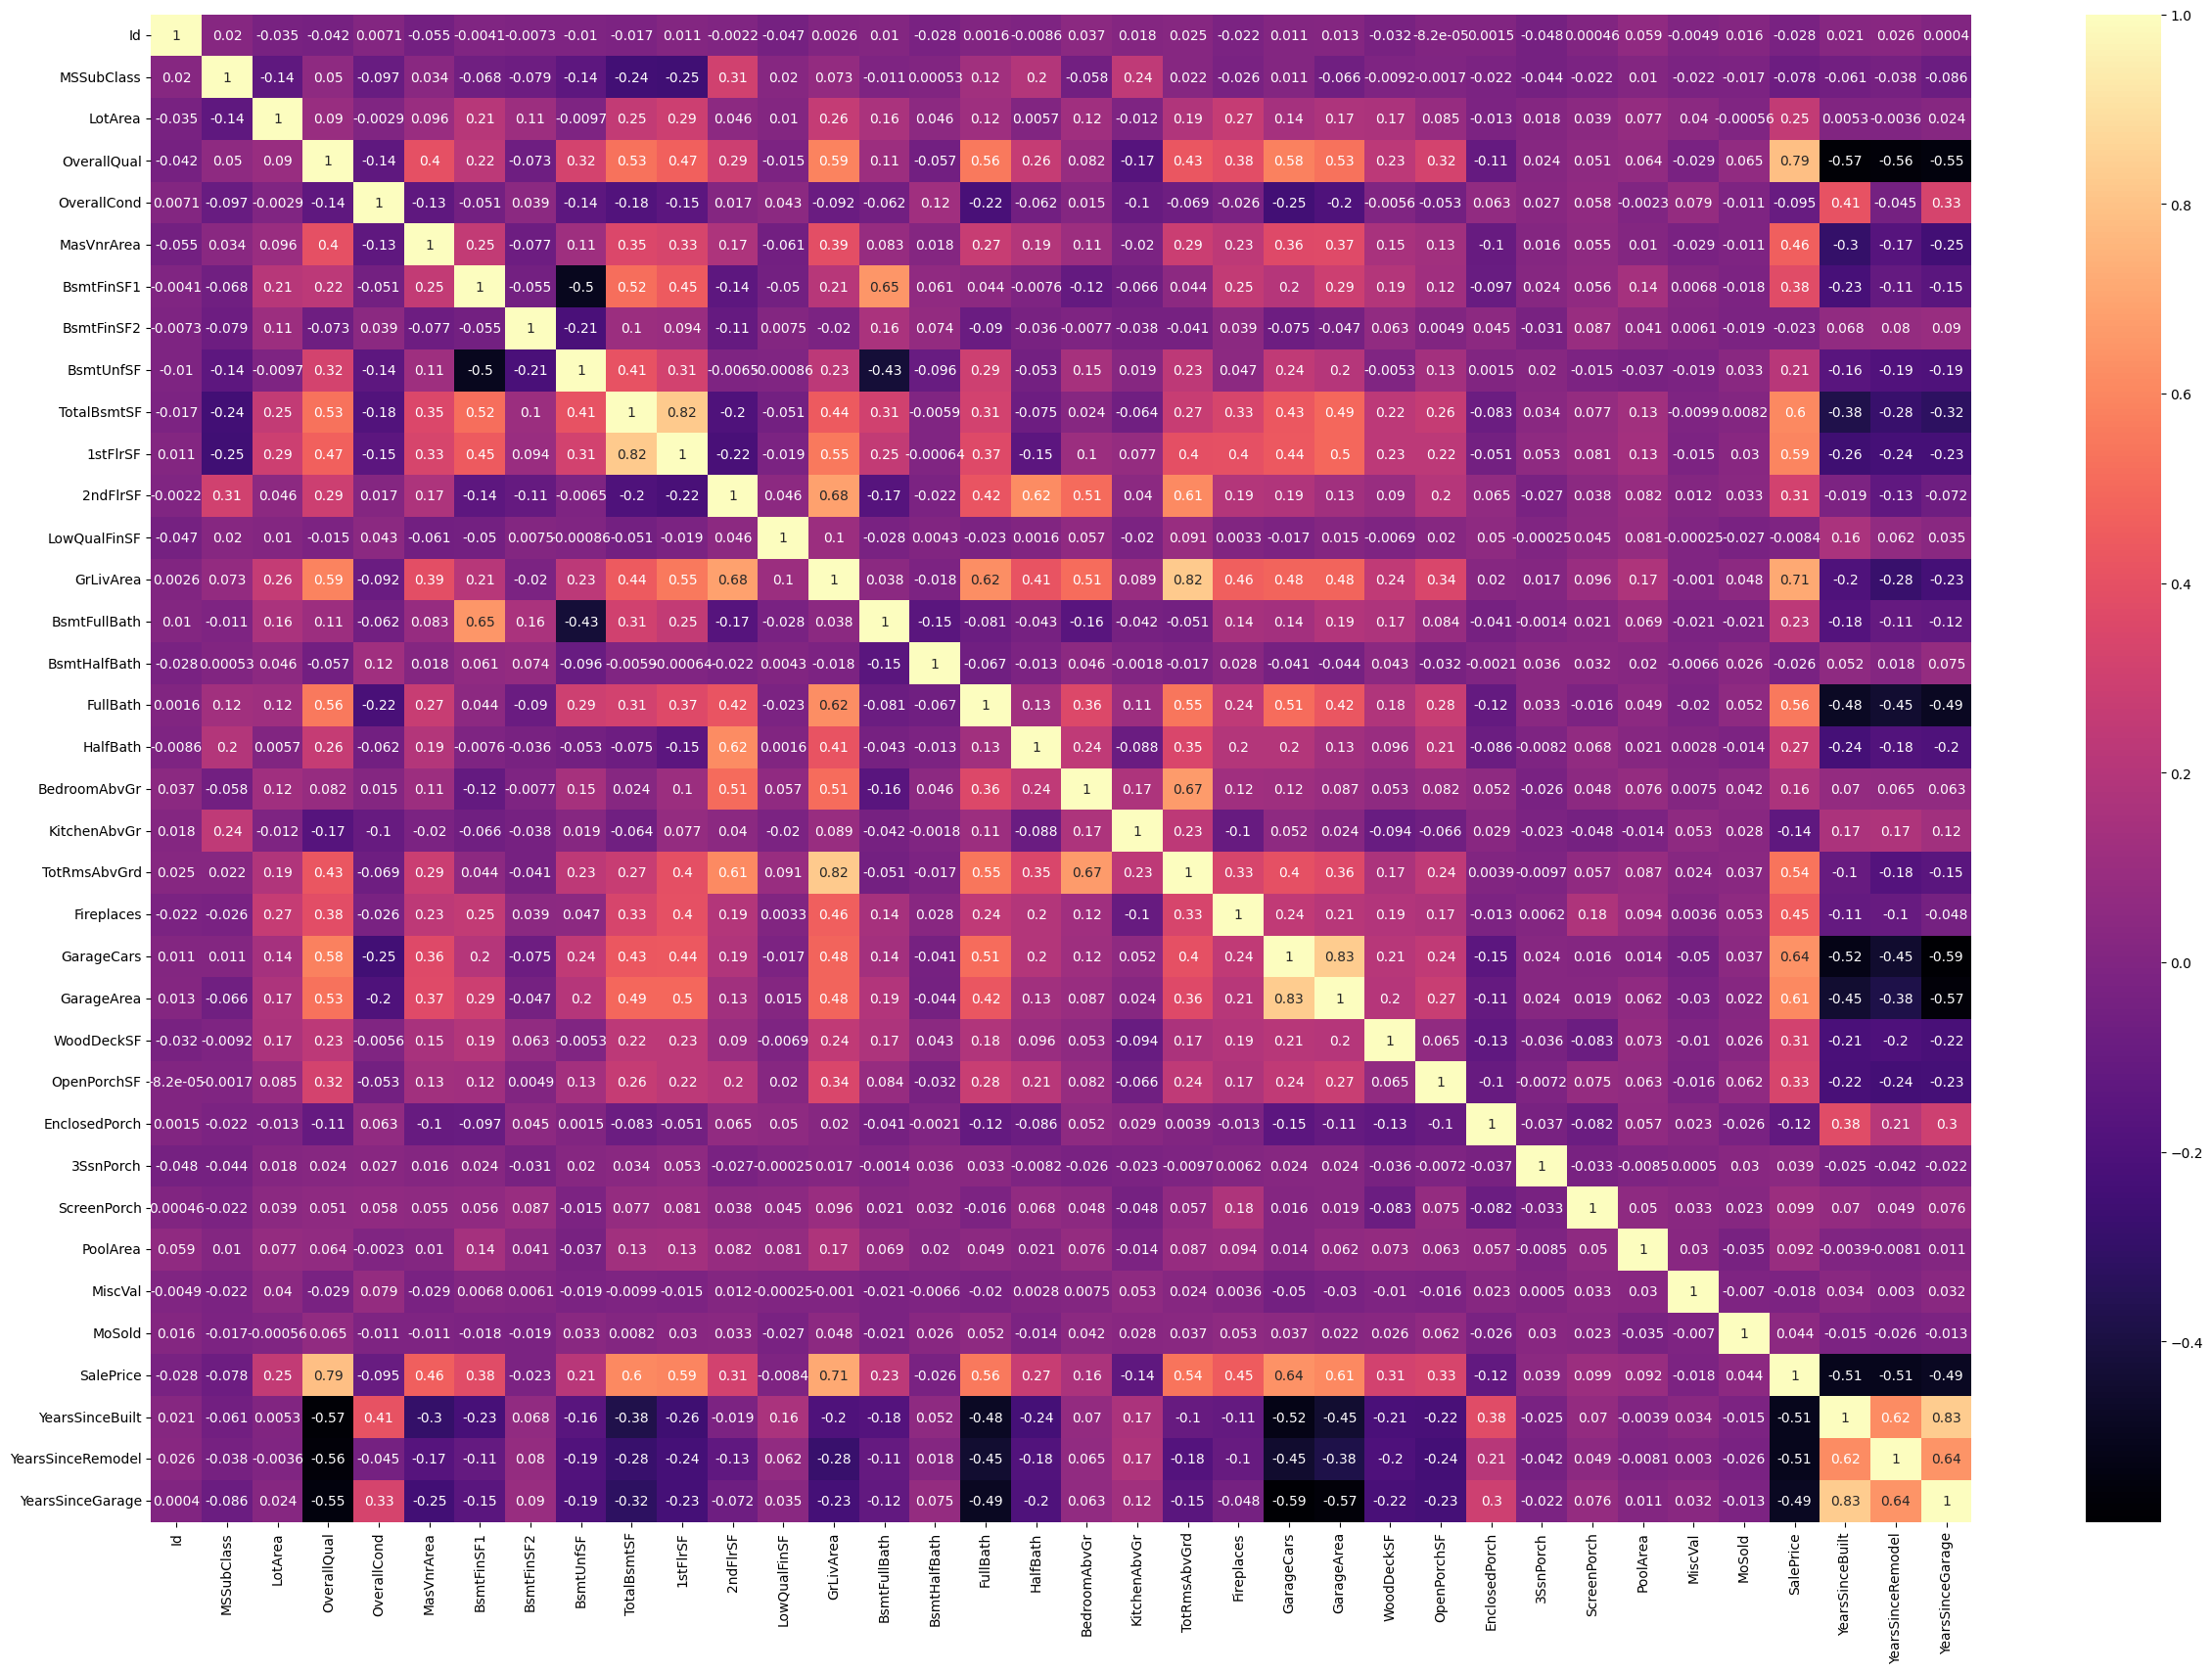

In [53]:

#correlation heatmap of numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(30, 20))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='magma')
plt.show()

In [58]:
# Absolute correlation matrix
corr_matrix = df[numeric_cols].corr().abs()

# Get upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'YearsSinceGarage']
